# **COVID-19 Data-processing and visualization**
Visualization of COVID-19 data. Data was scrapped from online running site and some data is taken from kaggle.

Importing essential liberaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Importing the AGeGroup detail file, which shows the trend of the cases divided on the basis of age.

In [2]:
age_data = pd.read_csv("AgeGroupDetails.csv")
age_data.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


Adding mean age for each group

In [3]:
age_data["meanAge"] = age_data["Sno"]*10 - 5

In [4]:
age_data.head()

,Sno,AgeGroup,TotalCases,Percentage,meanAge
0,1,0-9,22,3.18%,5
1,2,10-19,27,3.90%,15
2,3,20-29,172,24.86%,25
3,4,30-39,146,21.10%,35
4,5,40-49,112,16.18%,45


In [5]:
age_data["TotalCases"].describe()

count     10.000000
mean      69.200000
std       59.241127
min        9.000000
25%       23.250000
50%       52.500000
75%      106.250000
max      172.000000
Name: TotalCases, dtype: float64

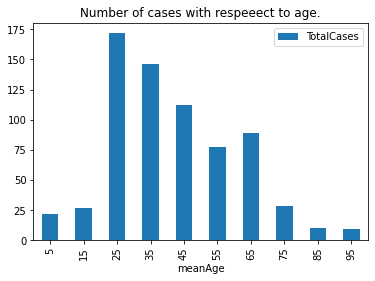

In [6]:
age_data.plot(x="meanAge", y="TotalCases", kind="bar", title = "Number of cases with respeeect to age.")

**Citizen in the age group of 20-30 were worst hit by the total cases. This is the data from initial 30-40 days, when India was hit by COVID-19. The possible reason would have been the movement of this age group. They were most exposed to the virus**

In [7]:
india_data = pd.read_csv("covid_19_india.csv")
india_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,1/2/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,3/2/2020,6:00 PM,Kerala,3,0,0,0,3


Checking Null values

In [8]:
india_data.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [9]:
india_data.describe()

,Sno,Cured,Deaths,Confirmed
count,3351.000000,3351.000000,3351.000000,3351.000000
mean,1676.000000,1432.521635,93.457774,3090.470307
std,967.494703,5085.838368,407.541084,10470.065534
min,1.000000,0.000000,0.000000,0.000000
25%,838.500000,1.000000,0.000000,15.000000
50%,1676.000000,33.000000,1.000000,156.000000
75%,2513.500000,568.000000,24.000000,1810.000000
max,3351.000000,67706.000000,6283.000000,135796.000000


In [10]:
india_data = india_data.drop(["ConfirmedIndianNational" , "ConfirmedForeignNational", "Time","Sno"],axis=1)

In [11]:
india_data.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
3346,22/06/20,Tripura,782,1,1237
3347,22/06/20,Uttarakhand,1521,28,2402
3348,22/06/20,Uttar Pradesh,11601,569,18322
3349,22/06/20,West Bengal,8687,569,14358
3350,22/06/20,Cases being reassigned to states,0,0,8015


Creating a new data base, to big the information of till date total cases for each state in India.

In [12]:
states_data = india_data.groupby("State/UnionTerritory").sum()
states_data.reset_index(level=0, inplace=True)
states_data.head()

,State/UnionTerritory,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,1952,0,2421
1,Andhra Pradesh,114717,3774,225342
2,Arunachal Pradesh,164,0,1711
3,Assam,37254,240,85578
4,Bihar,98190,1149,183404


In [13]:
from matplotlib.pyplot import figure

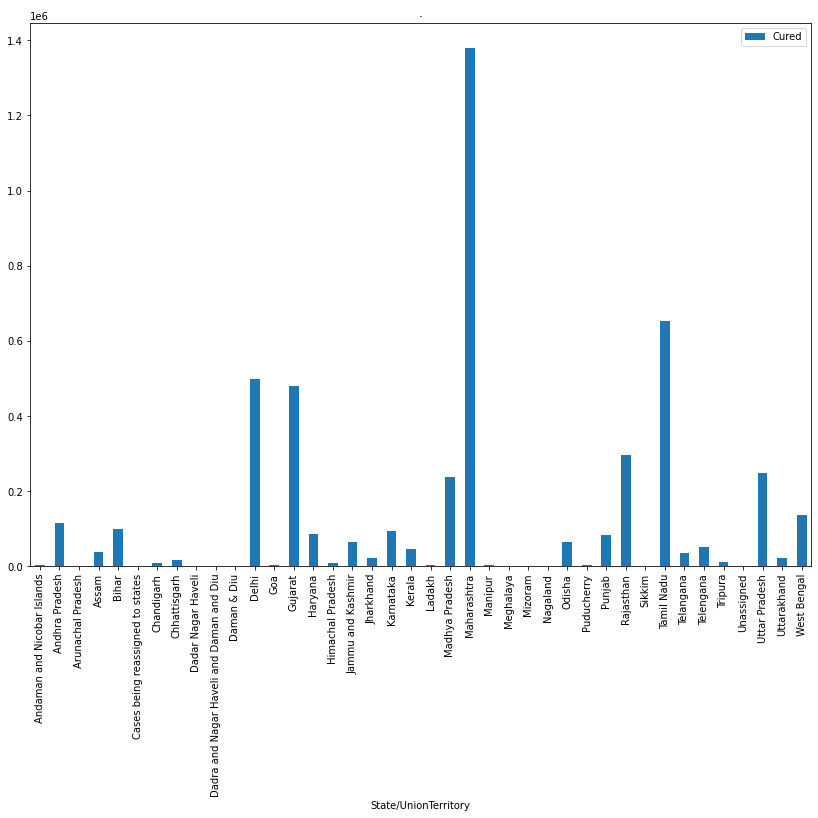

In [14]:
states_data.plot(x="State/UnionTerritory", y="Cured", kind="bar", title = ".",figsize = (14,10))
plt.tick_params(axis='x', which='major', labelsize=10)

**Maharastra was worst hit by the COVID-19 in India, while Union territories were quite safe.**



---
Graph showing deaths per state and UT.


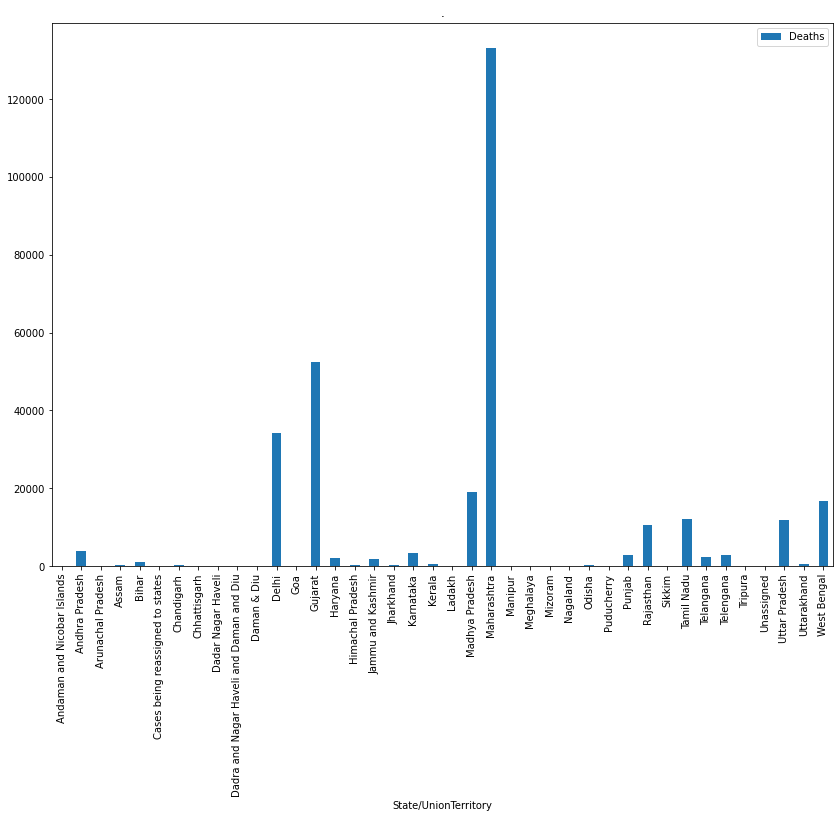

In [15]:
states_data.plot(x="State/UnionTerritory", y="Deaths", kind="bar", title = ".",figsize = (14,10))
plt.tick_params(axis='x', which='major', labelsize=10)

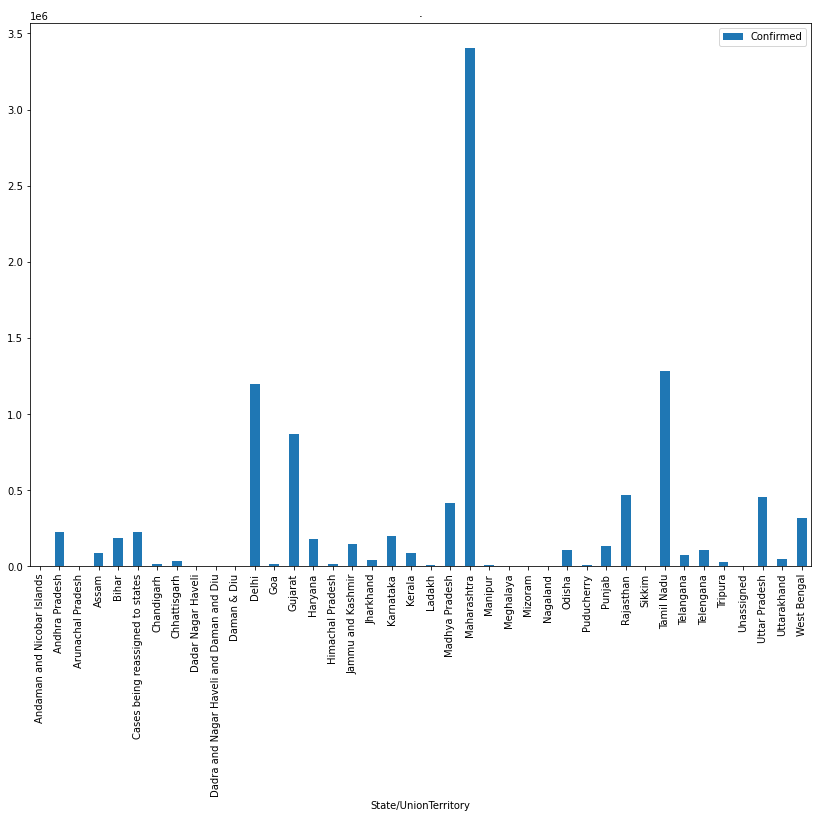

In [16]:
states_data.plot(x="State/UnionTerritory", y="Confirmed", kind="bar", title = ".",figsize = (14,10))
plt.tick_params(axis='x', which='major', labelsize=10)

Creating a date-wise data for India.

In [17]:
date_wise = india_data.groupby("Date").sum()
date_wise.reset_index(level=0, inplace=True)
date_wise.head()

,Date,Cured,Deaths,Confirmed
0,1/2/2020,0,0,2
1,1/3/2020,0,0,3
2,1/4/2020,144,41,1834
3,1/5/2020,9065,1152,34972
4,1/6/2020,91819,5394,190535


In [ ]:
Adding active cases column.

In [18]:
date_wise['Active Cases'] = date_wise['Confirmed'] - date_wise['Cured'] - date_wise['Deaths']
date_wise.head()

,Date,Cured,Deaths,Confirmed,Active Cases
0,1/2/2020,0,0,2,2
1,1/3/2020,0,0,3,3
2,1/4/2020,144,41,1834,1649
3,1/5/2020,9065,1152,34972,24755
4,1/6/2020,91819,5394,190535,93322


In [20]:
india = date_wise.copy()
date_wise = date_wise.sort_values(by=['Active Cases'])
# date_wise.tail()
# india.head()

In [21]:
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

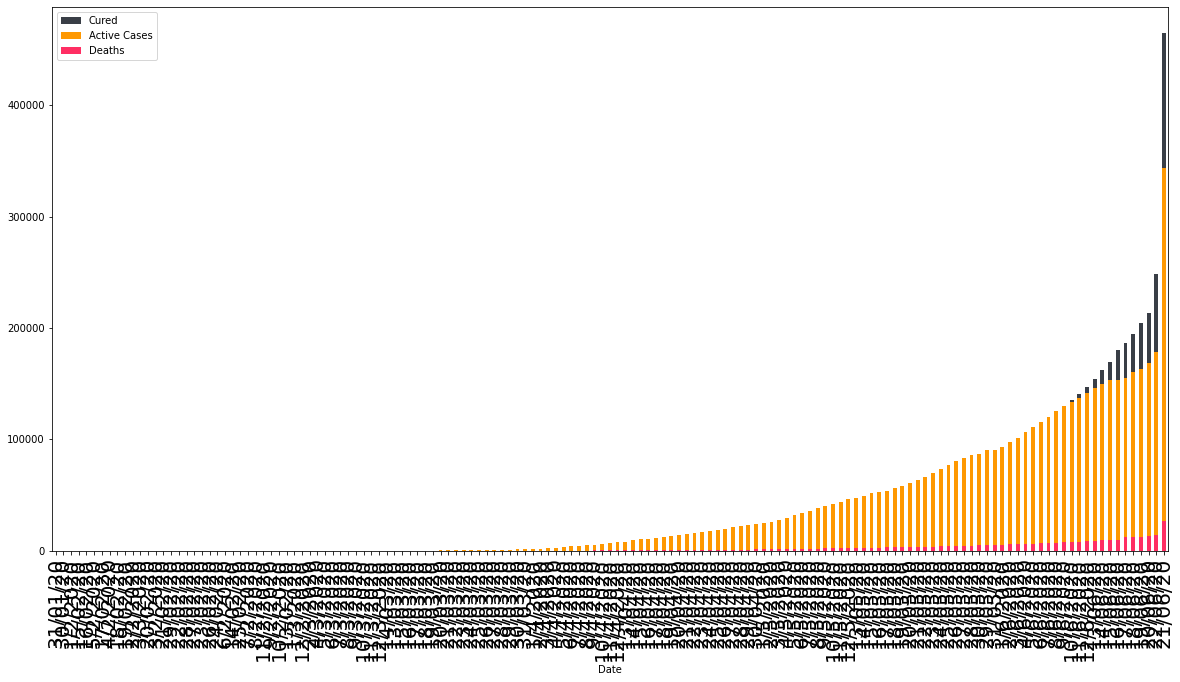

In [22]:
ax = date_wise.plot(x="Date", y="Cured", kind="bar", color = cnf)
date_wise.plot(x="Date", y="Active Cases", kind="bar", ax=ax, color=act)
date_wise.plot(x="Date", y="Deaths", kind="bar", ax=ax, color=dth, figsize = (20,10))
plt.tick_params(axis='x', which='major', labelsize=20)
plt.show()

**Date-wise representation of deaths, active cases and cured in one graph**

In [23]:
from plotly.subplots import make_subplots

fig_c = px.bar(date_wise, x="Date", y="Confirmed", color_discrete_sequence=['#000000'])
fig_d = px.bar(date_wise, x="Date", y="Deaths", color_discrete_sequence=['#ff677d'])
fig_r = px.bar(date_wise, x="Date", y="Cured", color_discrete_sequence=['#649d66'])

fig = make_subplots(rows=3, cols=1, shared_xaxes=False, 
                    horizontal_spacing=0.14, vertical_spacing=0.1,
                    subplot_titles=('Confirmed cases', 
                                    'Deaths reported',  
                                    'Cured'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=2, col=1)
fig.add_trace(fig_r['data'][0], row=3, col=1)

fig.update_layout(height=1400)

**All three graphs shows the trend of deaths,recovered and active cases in India. All suggesting that India is getting worst and worst in term of COVID-19 cases**

In [24]:
beds = pd.read_csv("HospitalBedsIndia.csv")
population = pd.read_csv("population_india_census2011 - population_india_census2011.csv")

In [25]:
beds.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


Checking for null values.

In [26]:
beds.isnull().sum()

Sno                                 0
State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        7
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

In [27]:
beds.fillna(0,inplace = True)
beds.tail(10)

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
27,28,Punjab,521,146,47.0,28,742,13527,510,5805,172,12128
28,29,Rajasthan,2463,579,64.0,33,3139,51844,602,21088,150,10760
29,30,Sikkim,25,2,1.0,4,32,1145,24,260,9,1300
30,31,Tamil Nadu,1854,385,310.0,32,2581,72616,692,40179,525,37353
31,32,Telangana,788,82,47.0,15,932,17358,802,7668,61,13315
32,33,Tripura,114,22,12.0,9,157,4895,99,1140,56,3277
33,34,Uttar Pradesh,3277,671,0.0,174,4122,58310,4442,39104,193,37156
34,35,Uttarakhand,275,69,19.0,20,383,6660,410,3284,50,5228
35,36,West Bengal,1374,406,70.0,55,1905,51163,1272,19684,294,58882
36,37,All India,"29,899",5568,1255.0,1003,37725,739024,19810,279588,3772,431173


In [28]:
temp = beds[["NumPublicBeds_HMIS","NumRuralBeds_NHP18","NumUrbanBeds_NHP18"]]

In [29]:
beds["Total beds"] = temp.sum(axis=1)
beds = beds[["State/UT","Total beds"]]
beds = beds.drop(index = 36,axis=0)
beds.head(6)

,State/UT,Total beds
0,Andaman & Nicobar Islands,2321
1,Andhra Pradesh,83937
2,Arunachal Pradesh,4724
3,Assam,36257
4,Bihar,29815
5,Chandigarh,4534


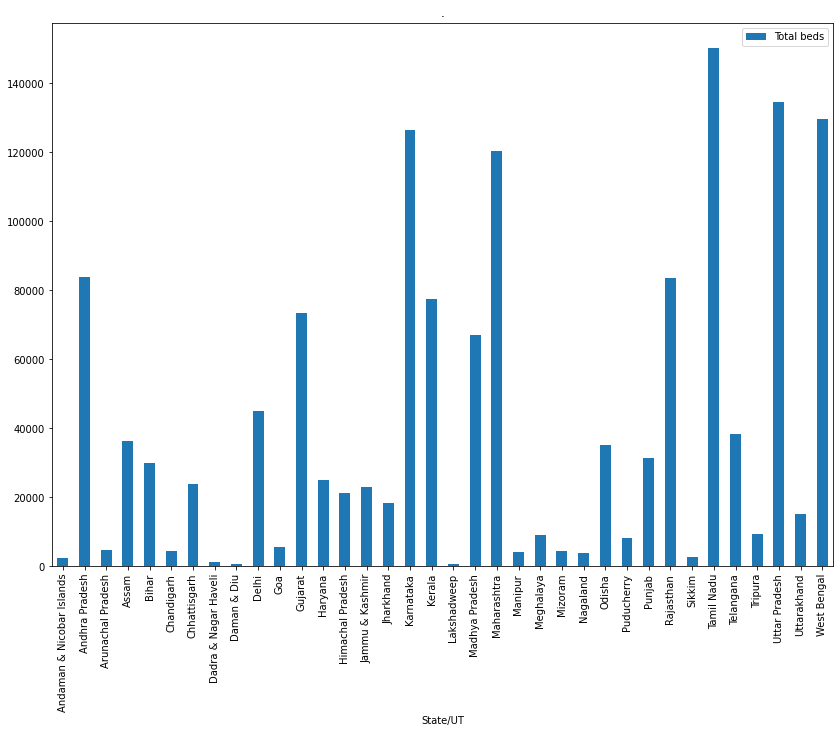

In [30]:
beds.plot(x="State/UT", y="Total beds", kind="bar", title = ".",figsize = (14,10))
plt.tick_params(axis='x', which='major', labelsize=10)

**Total number of hospital beds available in states and UTs in India**

---
Tamil Nadu holds maximum hospitals in India


In [31]:
population.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)",828.0,912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365.0,929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)",1102.0,918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)",1029.0,953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236.0,931


In [32]:
pop_density = population[["State / Union Territory","Density"]]
pop_density.head()

,State / Union Territory,Density
0,Uttar Pradesh,828.0
1,Maharashtra,365.0
2,Bihar,1102.0
3,West Bengal,1029.0
4,Madhya Pradesh,236.0


In [33]:
states_data.count()
beds.count()
pop_density.count()

State / Union Territory    36
Density                    36
dtype: int64

In [34]:
states_data = states_data.merge(beds, left_on='State/UnionTerritory', right_on='State/UT')
states_data = states_data.merge(pop_density,left_on='State/UnionTerritory',right_on= 'State / Union Territory')

Merging all the data.

In [35]:
states_data = states_data.drop(["State/UT","State / Union Territory"],axis=1)
states_data

,State/UnionTerritory,Cured,Deaths,Confirmed,Total beds,Density
0,Andhra Pradesh,114717,3774,225342,83937,303.0
1,Arunachal Pradesh,164,0,1711,4724,17.0
2,Assam,37254,240,85578,36257,397.0
3,Bihar,98190,1149,183404,29815,1102.0
4,Chandigarh,9004,194,14362,4534,9252.0
5,Chhattisgarh,17349,142,36797,23766,189.0
6,Delhi,498448,34200,1197684,44955,11297.0
7,Goa,2365,1,11123,5679,394.0
8,Gujarat,480107,52564,869412,73409,308.0
9,Haryana,85437,2164,177014,25081,573.0


In [36]:
states_data1 = states_data.drop(["State/UnionTerritory"],axis=1)

In [37]:
corrMatrix = states_data1.corr()
print (corrMatrix)

               Cured    Deaths  Confirmed  Total beds   Density
Cured       1.000000  0.930876   0.991570    0.612981  0.113894
Deaths      0.930876  1.000000   0.949274    0.456523  0.084071
Confirmed   0.991570  0.949274   1.000000    0.561338  0.133143
Total beds  0.612981  0.456523   0.561338    1.000000 -0.083458
Density     0.113894  0.084071   0.133143   -0.083458  1.000000


**This correlation matrix suggest a strong relation between Cured/Deaths and confirmed. While it also holds a good relation with the beds available. Another thing to notce is, Density (population density) don't holds good relation. This is because if the densly populated area has no or very less active cases, irrespective of population....the situation remain under control. No transmission of virus is observed.**

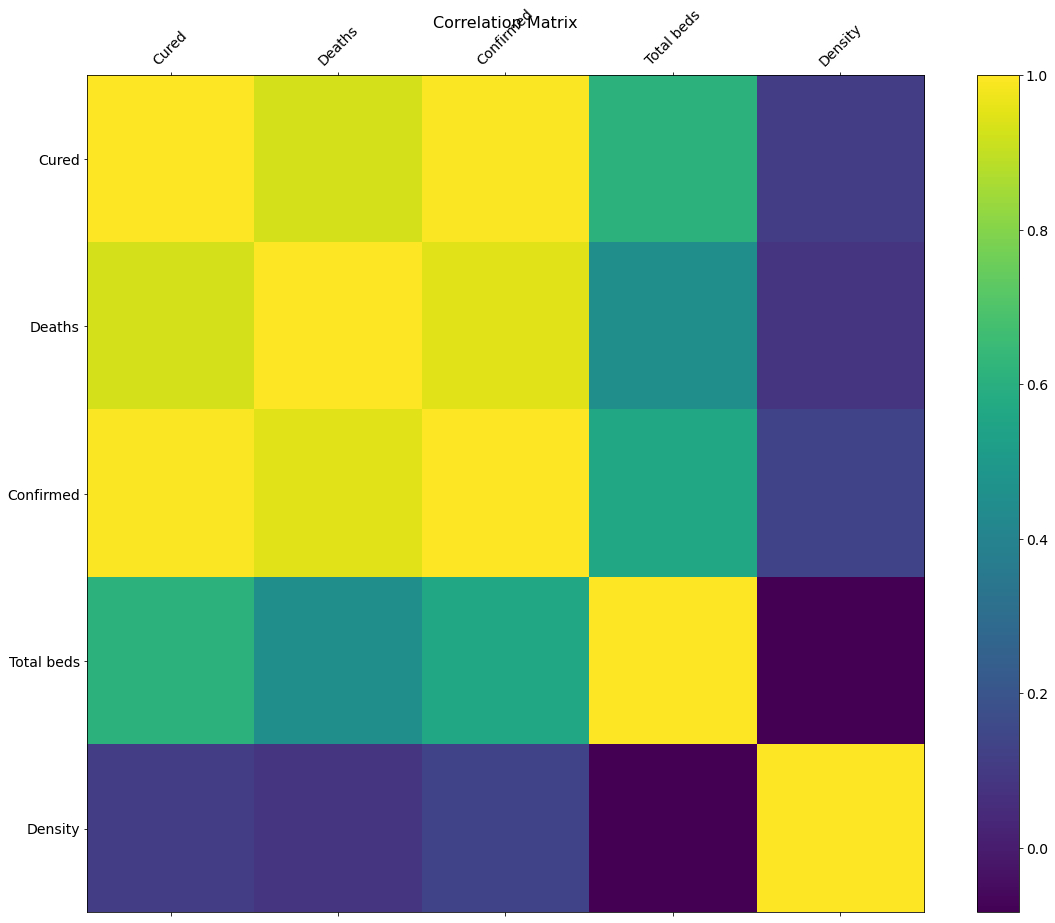

In [38]:


f = plt.figure(figsize=(19, 15))
plt.matshow(states_data1.corr(), fignum=f.number)
plt.xticks(range(states_data1.shape[1]), states_data1.columns, fontsize=14, rotation=45)
plt.yticks(range(states_data1.shape[1]), states_data1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [39]:
import seaborn as sns 

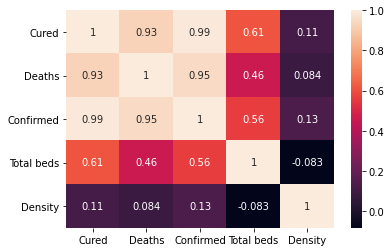

In [40]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

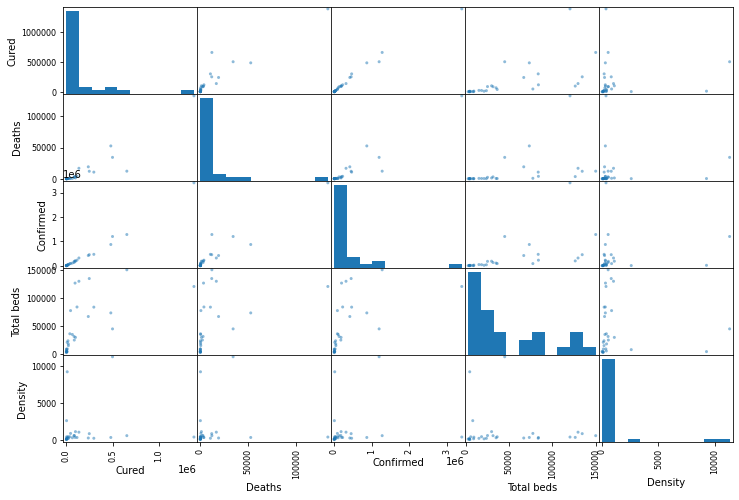

In [41]:
from pandas.plotting import scatter_matrix

attributes = ['Cured', 'Deaths', 'Confirmed', 'Total beds', 'Density']
scatter_matrix(states_data1[attributes], figsize=(12, 8))
plt.show()

**These scatter plot verifies our assumption, done from the correlation matrix.**

In [42]:
date_wise["Date"] = pd.to_datetime(date_wise["Date"],dayfirst=True)
date_wise = date_wise.sort_values(by=['Date'])


In [43]:
date_wise.shape

(145, 5)

In [45]:
import statsmodels.formula.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [46]:
model = sm.ols('Cured~Date', data=date_wise).fit()
pred = model.predict(date_wise["Date"])

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Cured   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 09 Oct 2020   Prob (F-statistic):                nan
Time:                        19:09:40   Log-Likelihood:                 3031.6
No. Observations:                 145   AIC:                            -5773.
Df Residuals:                       0   BIC:                            -5342.
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -4.388e-11        inf         -0        nan         nan         nan
Date[T.Timestamp('2020-01-31 00:00:00')]   5.51e-10        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-01 00:00:00')] -5.844e-10        inf         -0        nan         nan         nan
Date[T.Timestamp('2020-02-02 00:00:00')] -7.082e-11        inf         -0        nan         nan         nan
Date[T.Timestamp('2020-02-03 00:00:00')]  3.384e-10        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-04 00:00:00')] -4.623e-10        inf         -0        nan         nan         nan
Date[T.Timestamp('2020-02-05 00:00:00')]  4.133e-10        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-06 00:00:00')]  2.121e-10        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-07 00:00:00')] -2.515e-10        inf         -0        nan         nan         nan
Date[T.Timestamp('2020-02-08 00:00:00')] -4.857e-10        inf         -0        nan         nan         nan
Date[T.Timestamp('2020-02-09 00:00:00')]  4.631e-11        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-10 00:00:00')] -3.681e-10        inf         -0        nan         nan         nan
Date[T.Timestamp('2020-02-11 00:00:00')] -1.738e-10        inf         -0        nan         nan         nan
Date[T.Timestamp('2020-02-12 00:00:00')]  5.592e-10        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-13 00:00:00')] -8.323e-10        inf         -0        nan         nan         nan
Date[T.Timestamp('2020-02-14 00:00:00')]  3.116e-10        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-15 00:00:00')]  6.915e-10        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-16 00:00:00')] -1.321e-10        inf         -0        nan         nan         nan
Date[T.Timestamp('2020-02-17 00:00:00')] -3.892e-10        inf         -0        nan         nan         nan
Date[T.Timestamp('2020-02-18 00:00:00')]  1.959e-10        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-19 00:00:00')] -1.009e-10        inf         -0        nan         nan         nan
Date[T.Timestamp('2020-02-20 00:00:00')]  9.556e-11        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-21 00:00:00')]  4.839e-11        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-22 00:00:00')]  8.834e-11        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-23 00:00:00')]  3.314e-10        inf          0        nan         nan         nan
Date[T.Timestamp('2020-02-24 00

Here The R-sqaure value is turned out to aprox 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import requests
import bs4
import lxml.etree as xml
from bs4 import BeautifulSoup
import csv, json, requests, sys
from pandas.io.html import read_html
from matplotlib.ticker import ScalarFormatter

In [ ]:
!pip install lmfit

     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 215kB 8.9MB/s 
     |████████████████████████████████| 256kB 11.4MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.1-cp36-none-any.whl size=81991 sha256=07aaf1fce80b05028806f0c37a4b97670d0304b989109b265c24e86f39615792
  Stored in directory: /root/.cache/pip/wheels/ef/22/8d/6cd9c0af36f501cfb248673b05dad5d2c27504951d55519acb
  Created wheel for asteval: filename=asteval-0.9.19-cp36-none-any.whl size=17486 sha256=9486826f2cc0799ceada94543bd388e80011dc9583908d8c1ac4938df9a6b2fc
  Stored in directory: /root/.cache/pip/wheels/59/da/bf/62853db4291f1c5f91326e32e4d1766b8cfcccd1c0e6eaf53f
Successfully built lmfit asteval


In [ ]:
from scipy.integrate import odeint
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import dates
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
from lmfit import minimize, Parameters, Parameter, report_fit

In [ ]:
from sklearn.metrics import r2_score

In general function to plot graphs

In [ ]:
def line_plot(df, title, xlabel=None, ylabel="Cases", h=None, v=None,
              xlim=(None, None), ylim=(0, None), math_scale=True, y_logscale=False, y_integer=False):

    ax = df.plot()
    if math_scale:
        ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
        ax.ticklabel_format(style="sci",  axis="y",scilimits=(0, 0))
    if y_logscale:
        ax.set_yscale("log")
    if y_integer:
        fmt = matplotlib.ticker.ScalarFormatter(useOffset=False)
        fmt.set_scientific(False)
        ax.yaxis.set_major_formatter(fmt)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.legend(bbox_to_anchor=(1.02, 0), loc="lower left", borderaxespad=0)
    if h is not None:
        ax.axhline(y=h, color="black", linestyle="--")
    if v is not None:
        if not isinstance(v, list):
            v = [v]
        for value in v:
            ax.axvline(x=value, color="black", linestyle="--")
    plt.tight_layout()
    plt.show()

Data Scrapping from Wikipedia

In [ ]:
url  ='https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_India'
content = requests.get(url)
soup = BeautifulSoup(content.content, 'lxml')
record = read_html(url,  attrs={"class":"wikitable mw-collapsible"})
main = pd.DataFrame(record[0])

ValueError: ignored

In [ ]:
main.head()

Date (2020)       State/Union Territory                 ... Deaths       Source(s)
  Date (2020) Andaman and Nicobar Islands Andhra Pradesh  ...    New Total Source(s)
0      Jan-30                         NaN            NaN  ...    NaN   NaN       NaN
1      Feb-02                         NaN            NaN  ...    NaN   NaN       NaN
2      Feb-03                         NaN            NaN  ...    NaN   NaN       NaN
3      Mar-02                         NaN            NaN  ...    NaN   NaN     [474]
4      Mar-03                         NaN            NaN  ...    NaN   NaN     [475]

[5 rows x 40 columns]

Data processing

In [ ]:
cases_india=np.array(main['Cases[a]'])
dates_india=np.array(main['Date (2020)'])
deaths_india=np.array(main['Deaths'])
cases_india = np.delete(cases_india, 0, 1)

In [ ]:
raw = pd.read_csv("covid_19_data.csv")
raw.describe()

,SNo,Confirmed,Deaths,Recovered
count,14171.000000,14171.000000,14171.000000,14171.000000
mean,7086.000000,1796.447675,90.167949,441.899372
std,4090.959667,10017.978360,790.707358,3765.685067
min,1.000000,0.000000,0.000000,0.000000
25%,3543.500000,6.000000,0.000000,0.000000
50%,7086.000000,62.000000,0.000000,1.000000
75%,10628.500000,412.500000,4.000000,30.000000
max,14171.000000,181026.000000,19468.000000,64264.000000


Adding few more columns

In [ ]:
a=cases_india.size
infected = [None]*(a-4)
dates_india_final = [None]*(a-4)
for i in range ((a)-4):
  infected[i]=cases_india[i][0]
  dates_india_final[i] = dates_india[i][0]
infected = np.asarray(infected, dtype=np.int64)
infected.astype(int)
print(infected)

[    1     2     3     5     6    28    30    31    34    39    44    50
    60    73    81    97   107   118   137   151   173   223   283   360
   434   519   606   694   834   918  1024  1251  1397  1834  2069  2547
  3072  3577  4281  4789  5274  5865  6761  7529  8447  9352 10815 11933
 12759 13835 14792 16116 17656 18985 20471 21700 23452 24942 26917]


Growth rate of the infected cases in India.

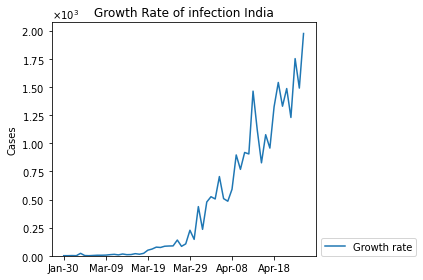

In [ ]:
dates_india_final = dates_india_final[:-1]
a = infected.size
rate_infection = [None]*(a-1)
for i in range (a-1):
  rate_infection[i] = infected[i+1] - infected[i]
rate_infections = pd.DataFrame(rate_infection, index=dates_india_final, columns =['Growth rate'])
line_plot(rate_infections,"Growth Rate of infection India")

**From day 1 the cases are increasing, but the growth rate (i.e. the rate of increasing) too is increasing day by day.

---
It is said the time when growth rate start reducing we can think that the infection rate is coming to halt.
And when it comes to -ve, it is said that the pendamic is going under control. ** 



In [ ]:
df = pd.DataFrame(deaths_india, columns =['Tag', 'number'])  
df1 = df.drop(len(df)-1)
df1 = df1.drop(len(df1)-1)
df1 = df1.drop(len(df1)-1)
df1 = df1.drop(len(df1)-1)
df1 = df1.drop(['Tag'],axis = 1)
df1=df1.replace(to_replace = np.nan, value = 0) 
deaths = df1.to_numpy()
deaths = np.asarray(deaths, dtype=np.int64)
deaths = deaths.astype(int)
deaths1 = deaths.flatten()
print(deaths1) 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   2   2   2
   3   3   4   4   4   7   9   9  12  16  18  20  27  32  35  41  53  62
  75  83 111 124 149 169 206 242 273 324 353 392 420 452 488 519 559 603
 652 686 723 779 826]


Growth rate of the deaths cases in India.

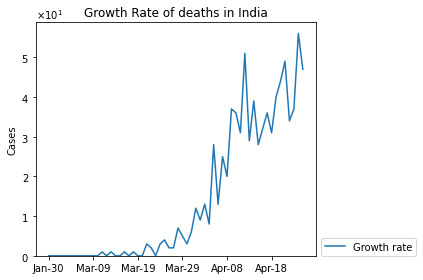

In [ ]:
a = deaths1.size
rate_death = [None]*(a-1)
for i in range (a-1):
  rate_death[i] = deaths1[i+1] - deaths1[i]
rate_deaths = pd.DataFrame(rate_death, index=dates_india_final, columns =['Growth rate'])
line_plot(rate_deaths,"Growth Rate of deaths in India")

In [ ]:
a = len(rate_infection)
del dates_india_final[0]
growth_rate_infection = [None]*(a-1)
growth_factor_death = [None]*(a-1)
for i in range (a-1):
  if rate_infection[i]==0:
    growth_rate_infection[i] =0
  else:  
    growth_rate_infection[i] = rate_infection[i+1]/rate_infection[i]
  if rate_death[i]==0:
    growth_factor_death[i] =0
  else:  
    growth_factor_death[i] = rate_death[i+1]/rate_death[i]


Growth factor of the infacted cases in India.

---


Where growth factor is the rate by which the growth rate is increasing.




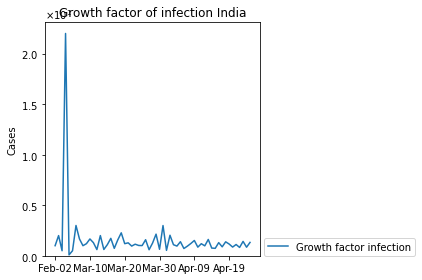

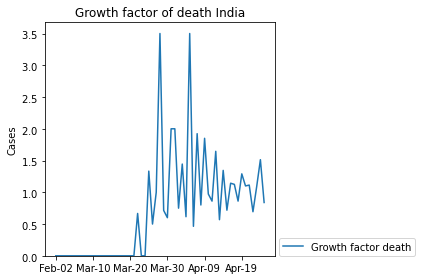

In [ ]:
growth_factor_infection_india = pd.DataFrame(growth_rate_infection, index=dates_india_final, columns =['Growth factor infection'])
line_plot(growth_factor_infection_india,"Growth factor of infection India")
growth_factor_death_india = pd.DataFrame(growth_factor_death, index=dates_india_final, columns =['Growth factor death'])
line_plot(growth_factor_death_india,"Growth factor of death India")

**Growth factor can be defined as rate of increase or decrease of the rate of cases. Or double derivative in mathematical terms.**

---
In India it is not strictly increasing, which is pretty good news. But pandemic would be said to be in control once it goes to negative.


In [ ]:
days_since_start = np.array([i for i in range(len(infected))]).reshape(-1, 1)

Taking population into account.

In [ ]:
population_dict ={'Global': 7454412229, 'China': 1376807262, 'India': 1339000000, 'US': 327200000, 'Italy': 60480000}

In [ ]:
us_data = pd.read_excel('USA.xlsx')
#us_data.head()

In [ ]:
pd.DataFrame(raw.isnull().sum()).T
", ".join(raw["Country/Region"].unique().tolist())

"Mainland China, Hong Kong, Macau, Taiwan, US, Japan, Thailand, South Korea, Singapore, Philippines, Malaysia, Vietnam, Australia, Mexico, Brazil, Colombia, France, Nepal, Canada, Cambodia, Sri Lanka, Ivory Coast, Germany, Finland, United Arab Emirates, India, Italy, UK, Russia, Sweden, Spain, Belgium, Others, Egypt, Iran, Israel, Lebanon, Iraq, Oman, Afghanistan, Bahrain, Kuwait, Austria, Algeria, Croatia, Switzerland, Pakistan, Georgia, Greece, North Macedonia, Norway, Romania, Denmark, Estonia, Netherlands, San Marino,  Azerbaijan, Belarus, Iceland, Lithuania, New Zealand, Nigeria, North Ireland, Ireland, Luxembourg, Monaco, Qatar, Ecuador, Azerbaijan, Czech Republic, Armenia, Dominican Republic, Indonesia, Portugal, Andorra, Latvia, Morocco, Saudi Arabia, Senegal, Argentina, Chile, Jordan, Ukraine, Saint Barthelemy, Hungary, Faroe Islands, Gibraltar, Liechtenstein, Poland, Tunisia, Palestine, Bosnia and Herzegovina, Slovenia, South Africa, Bhutan, Cameroon, Costa Rica, Peru, Serbia

In [ ]:
data_cols = ["Infected", "Deaths", "Recovered"]
data_cols_all = ["Confirmed", "Infected", "Deaths", "Recovered"]
rate_cols = ["Fatal per Confirmed", "Recovered per Confirmed", "Fatal per (Fatal or Recovered)"]
variable_dict = {"Susceptible": "S", "Infected": "I", "Recovered": "R", "Deaths": "D"}

Removing and replacing some countries and their enteries.

In [ ]:
df = raw.rename({"ObservationDate": "Date", "Province/State": "Province"}, axis=1)
df["Date"] = pd.to_datetime(df["Date"])
df["Country"] = df["Country/Region"].replace(
    {
        "Mainland China": "China",
        "Hong Kong SAR": "Hong Kong",
        "Taipei and environs": "Taiwan",
        "Iran (Islamic Republic of)": "Iran",
        "Republic of Korea": "South Korea",
        "Republic of Ireland": "Ireland",
        "Macao SAR": "Macau",
        "Russian Federation": "Russia",
        "Republic of Moldova": "Moldova",
        "Taiwan*": "Taiwan",
        "Cruise Ship": "Others",
        "United Kingdom": "UK",
        "Viet Nam": "Vietnam",
        "Czechia": "Czech Republic",
        "St. Martin": "Saint Martin",
        "Cote d'Ivoire": "Ivory Coast",
        "('St. Martin',)": "Saint Martin",
        "Congo (Kinshasa)": "Congo",
    }
)
df["Province"] = df["Province"].fillna("-").replace(
    {
        "Cruise Ship": "Diamond Princess",
        "Diamond Princess cruise ship": "Diamond Princess"
    }
)
df.loc[df["Country"] == "Diamond Princess", ["Country", "Province"]] = ["Others", "Diamond Princess"]
df["Infected"] = df["Confirmed"] - df["Deaths"] - df["Recovered"]
df[data_cols_all] = df[data_cols_all].astype(np.int64)
ncov_df_ungrouped = df.loc[:, ["Date", "Country", "Province", *data_cols_all]]
#print(ncov_df_ungrouped.tail())
infected_indians = np.full(shape=73,fill_value=0.0,dtype=np.float)                                   
absd = np.array([0.0749,0.0754,0.0761,0.0769,0.0779,0.0790,0.0802,0.0816,0.0830,0.0842,0.0853,0.0863,0.0873,0.0882,0.0891]) 
infected_indians = np.concatenate([infected_indians, absd])
pd.DataFrame(ncov_df_ungrouped.isnull().sum()).T
", ".join(ncov_df_ungrouped["Country"].unique().tolist())

'China, Hong Kong, Macau, Taiwan, US, Japan, Thailand, South Korea, Singapore, Philippines, Malaysia, Vietnam, Australia, Mexico, Brazil, Colombia, France, Nepal, Canada, Cambodia, Sri Lanka, Ivory Coast, Germany, Finland, United Arab Emirates, India, Italy, UK, Russia, Sweden, Spain, Belgium, Others, Egypt, Iran, Israel, Lebanon, Iraq, Oman, Afghanistan, Bahrain, Kuwait, Austria, Algeria, Croatia, Switzerland, Pakistan, Georgia, Greece, North Macedonia, Norway, Romania, Denmark, Estonia, Netherlands, San Marino,  Azerbaijan, Belarus, Iceland, Lithuania, New Zealand, Nigeria, North Ireland, Ireland, Luxembourg, Monaco, Qatar, Ecuador, Azerbaijan, Czech Republic, Armenia, Dominican Republic, Indonesia, Portugal, Andorra, Latvia, Morocco, Saudi Arabia, Senegal, Argentina, Chile, Jordan, Ukraine, Saint Barthelemy, Hungary, Faroe Islands, Gibraltar, Liechtenstein, Poland, Tunisia, Palestine, Bosnia and Herzegovina, Slovenia, South Africa, Bhutan, Cameroon, Costa Rica, Peru, Serbia, Slovaki

In [ ]:
total_df = ncov_df_ungrouped.groupby("Date").sum()
total_df[rate_cols[0]] = total_df["Deaths"] / total_df[data_cols].sum(axis=1)
total_df[rate_cols[1]] = total_df["Recovered"] / total_df[data_cols].sum(axis=1)
total_df[rate_cols[2]] = total_df["Deaths"] / (total_df["Deaths"] + total_df["Recovered"])
total_df.tail()

,Confirmed,Infected,Deaths,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-04-07,1426096,1044177,81865,300054,0.057405,0.210402,0.214352
2020-04-08,1511104,1094105,88338,328661,0.058459,0.217497,0.211842
2020-04-09,1595350,1145920,95455,353975,0.059833,0.221879,0.212391
2020-04-10,1691719,1213098,102525,376096,0.060604,0.222316,0.214209
2020-04-11,1771514,1260901,108503,402110,0.061249,0.226987,0.212496


Over time cases graph presenting


1.   Infected
2.   Deaths
3.   Recovered




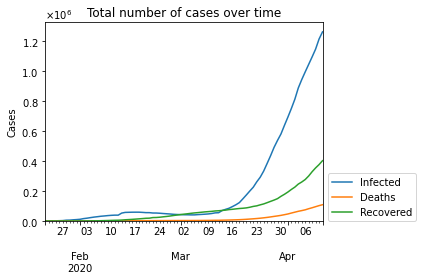

In [ ]:
line_plot(total_df[data_cols], "Total number of cases over time")

Growth rate for the global.

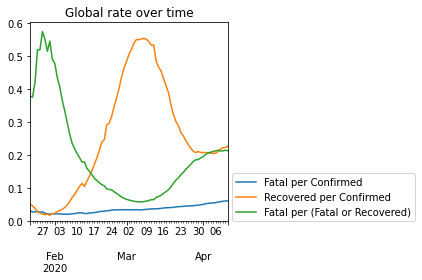

In [ ]:
line_plot(total_df[rate_cols], "Global rate over time", ylabel="", math_scale=False)


**Fetal per infected is the most interesting curve in the above graph. It can be divided in 3 parts - 
1. It was at its peak in the starting because the illness was unknown, no cure was available.
2. Doctors stated to figure out and slowly it started decreasing.
3. After a certain time, when hospital beds were short of the pateints, it statred rising again.**
---



In [ ]:
#total_df[rate_cols].head(5)

In [ ]:
total_df[rate_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Fatal per Confirmed,81.0,0.035452,0.011369,0.020408,0.025498,0.034036,0.043376,0.061249
Recovered per Confirmed,81.0,0.249411,0.172305,0.017365,0.104274,0.217497,0.387656,0.552602
Fatal per (Fatal or Recovered),81.0,0.196325,0.142110,0.057464,0.088459,0.158960,0.214209,0.573427


In [ ]:
india = ncov_df_ungrouped[ncov_df_ungrouped['Country'] == 'India']
india_data = india
india = india.drop(columns= ['Country', 'Province'])
india = india.set_index('Date') 

In [ ]:
india.head()

,Confirmed,Infected,Deaths,Recovered
Date,,,,
2020-01-30,1,1,0,0
2020-01-31,1,1,0,0
2020-02-01,1,1,0,0
2020-02-02,2,2,0,0
2020-02-03,3,3,0,0


In [ ]:
italy = ncov_df_ungrouped[ncov_df_ungrouped['Country'] == 'Italy']
italy = italy.drop(columns= ['Country', 'Province'])
italy = italy.set_index('Date') 

In [ ]:
us_data =us_data.set_index('Date')

In [ ]:
#us_data.head() 
us_data = us_data.drop(['SNo'], axis=1) 
us_data.head()

,Confirmed,Deaths,Recovered
Date,,,
01/22/2020,1,0,0
01/23/2020,1,0,0
01/24/2020,2,0,0
01/25/2020,2,0,0
01/26/2020,5,0,0


In [ ]:
usa = us_data

In [ ]:
india.head()

,Confirmed,Infected,Deaths,Recovered
Date,,,,
2020-01-30,1,1,0,0
2020-01-31,1,1,0,0
2020-02-01,1,1,0,0
2020-02-02,2,2,0,0
2020-02-03,3,3,0,0


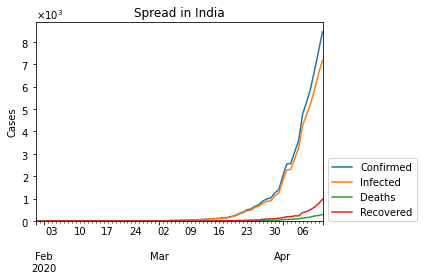

In [ ]:
line_plot(india, "Spread in India")

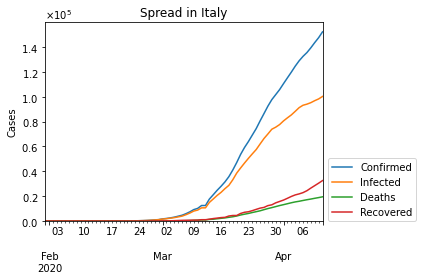

In [ ]:
line_plot(italy, "Spread in Italy")

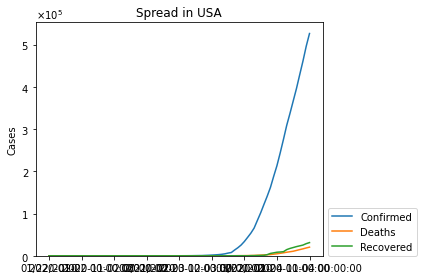

In [ ]:
line_plot(usa, "Spread in USA")

**Graphs of 3 countries which were very badly hit by COVID-19 are present here**
We can notice the concavity of the graphs, in India and USA the growth was bit steady, which could be said to be concave up. Bu Italy stood remarkably different, concave down. Which might be good but once it reaches the peak. ELse it signifies the situation to be more out of control!!